In [1]:
import os
import pandas as pd 
from Bio import SeqIO
from Bio.Seq import Seq
from tqdm import tqdm 
from concurrent.futures import ProcessPoolExecutor
from collections import Counter
from scipy.stats import mannwhitneyu,pearsonr
import numpy as np


clinvar_df_with_info = pd.read_csv('data_source/patho_analysis/clinvar_df_add_information.csv',
                                   sep=',') 
uniprot_seq_human_file = 'data_source/data_collection/uniprot_human_reviewed_20240621.fasta'

uid2uentry = {}
uentry2uid = {}
gn2uid = {}
gn2uentry = {}
uid2gn = {}
for record in SeqIO.parse(uniprot_seq_human_file,'fasta'):
    try:
        uniprot_entry = record.id.split('|')[-1]
        uniprot_id = record.id.split('|')[1]
        seq = str(record.seq)
        uid2uentry[uniprot_id] = uniprot_entry
        uentry2uid[uniprot_entry] = uniprot_id
    
        gene_name = record.description.split('GN=')[1].split(' ')[0]
        gn2uid[gene_name] = uniprot_id
        gn2uentry[gene_name] = uniprot_entry
        uid2gn[uniprot_id] = gene_name
    except:
        pass


clinvar_add_pstp = pd.read_csv(
    'data_source/patho_analysis/clinvar_add_plddt_iupred_pstpscores.csv',sep=',',)
cap = clinvar_add_pstp.copy()
clin_a_pP_lowpLDDT = cap[cap['pLDDT']<50]
clin_a_pP_lowpLDDT.reset_index(inplace=True,drop=True)
clin_a_pP_notlowpLDDT = cap[cap['pLDDT']>=50]
clin_a_pP_notlowpLDDT.reset_index(inplace=True,drop=True)
clin_a_pP_highpLDDT = cap[cap['pLDDT']>=70]
clin_a_pP_highpLDDT.reset_index(inplace=True,drop=True)
print(Counter(clinvar_add_pstp['clinvar_significance'].values))

patho_label,benign_label = ['Likely pathogenic','Pathogenic'],['Likely benign','Benign']
clin_a_pP_lowpLDDT_patho = clin_a_pP_lowpLDDT[clin_a_pP_lowpLDDT['clinvar_significance'].isin(patho_label)]
clin_a_pP_lowpLDDT_patho.reset_index(inplace=True,drop=True)

clin_a_pP_lowpLDDT_benign = clin_a_pP_lowpLDDT[clin_a_pP_lowpLDDT['clinvar_significance'].isin(benign_label)]
clin_a_pP_lowpLDDT_benign.reset_index(inplace=True,drop=True)


clin_a_pP_highpLDDT_patho = clin_a_pP_highpLDDT[clin_a_pP_highpLDDT['clinvar_significance'].isin(patho_label)]
clin_a_pP_highpLDDT_patho.reset_index(inplace=True,drop=True)
clin_a_pP_highpLDDT_benign = clin_a_pP_highpLDDT[clin_a_pP_highpLDDT['clinvar_significance'].isin(benign_label)]
clin_a_pP_highpLDDT_benign.reset_index(inplace=True,drop=True)

clin_a_pP_notlowpLDDT_patho = clin_a_pP_notlowpLDDT[clin_a_pP_notlowpLDDT['clinvar_significance'].isin(patho_label)]
clin_a_pP_notlowpLDDT_patho.reset_index(inplace=True,drop=True)
clin_a_pP_notlowpLDDT_benign = clin_a_pP_notlowpLDDT[clin_a_pP_notlowpLDDT['clinvar_significance'].isin(benign_label)]
clin_a_pP_notlowpLDDT_benign.reset_index(inplace=True,drop=True)


clin_a_pP_iuidr = cap[cap['iupred_score']>0.5]
clin_a_pP_iuidr.reset_index(inplace=True,drop=True)
print(Counter(clinvar_add_pstp['clinvar_significance'].values))
patho_label,benign_label = ['Likely pathogenic','Pathogenic'],['Likely benign','Benign']
clin_a_pP_iuidr_patho = clin_a_pP_iuidr[clin_a_pP_iuidr['clinvar_significance'].isin(patho_label)]
clin_a_pP_iuidr_patho.reset_index(inplace=True,drop=True)

clin_a_pP_iuidr_benign = clin_a_pP_iuidr[clin_a_pP_iuidr['clinvar_significance'].isin(benign_label)]
clin_a_pP_iuidr_benign.reset_index(inplace=True,drop=True)
print('idr defined by IUPred')
print(clin_a_pP_iuidr_patho.shape,clin_a_pP_iuidr_benign.shape)




Counter({'Likely benign': 64488, 'Benign': 28242, 'Likely pathogenic': 25125, 'Pathogenic': 21521})
Counter({'Likely benign': 64488, 'Benign': 28242, 'Likely pathogenic': 25125, 'Pathogenic': 21521})
idr defined by IUPred
(10635, 16) (46736, 16)


['G -> R' 'G -> D' 'G -> S' 'G -> V' 'G -> E' 'M -> I' 'M -> V' 'G -> A'
 'M -> T' 'G -> C' 'M -> L' 'M -> R' 'M -> K' 'S -> C' 'G -> W' 'S -> G'
 'K -> N' 'S -> N' 'S -> F' 'G -> K'] [0.07974163 0.07570056 0.06733507 0.05786603 0.04523841 0.03465088
 0.03235364 0.02977725 0.02786655 0.02773615 0.02554901 0.01004944
 0.00976569 0.00395919 0.00238728 0.00233402 0.00071718 0.00070613
 0.0003986  0.00037278]
['G -> R' 'G -> D' 'G -> S' 'G -> V' 'G -> E' 'G -> A' 'G -> C' 'M -> V'
 'P -> L' 'M -> L' 'M -> I' 'M -> T' 'R -> C' 'A -> T' 'P -> S' 'G -> W'
 'M -> R' 'Q -> R' 'R -> G' 'P -> R'] [0.16368585 0.15163297 0.13335925 0.11741835 0.09059098 0.05365474
 0.05287714 0.01321928 0.01010886 0.00894246 0.00855365 0.00816485
 0.00777605 0.00583204 0.00544323 0.00544323 0.00505443 0.00466563
 0.00466563 0.00466563]


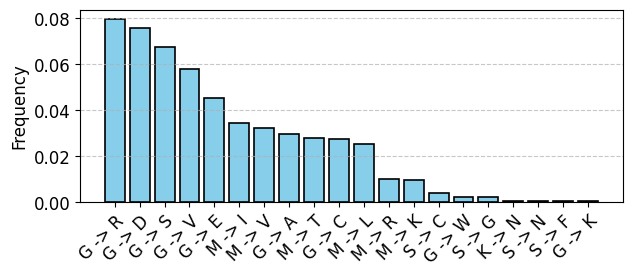

In [ ]:
''' 
residue distribution
'''
RESIDUES = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
            'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

aacount_df_lowpLDDT_patho = pd.DataFrame(data=np.zeros((20,20)),columns=RESIDUES,index=RESIDUES)
for wtaa,mtaa in zip(clin_a_pP_lowpLDDT_patho['wt_aa'].values,
                     clin_a_pP_lowpLDDT_patho['mt_aa'].values,):
    aacount_df_lowpLDDT_patho.loc[wtaa,mtaa] += 1
aaweight_df_lowpLDDT_patho = pd.DataFrame(
    data=aacount_df_lowpLDDT_patho.values/np.sum(aacount_df_lowpLDDT_patho.values),
    columns=RESIDUES,index=RESIDUES)


aacount_df_notlowpLDDT_patho = pd.DataFrame(
    data=np.zeros((20,20)),columns=RESIDUES,index=RESIDUES)
for wtaa,mtaa in zip(clin_a_pP_notlowpLDDT_patho['wt_aa'].values,
                     clin_a_pP_notlowpLDDT_patho['mt_aa'].values,):
    aacount_df_notlowpLDDT_patho.loc[wtaa,mtaa] += 1
aaweight_df_notlowpLDDT_patho = pd.DataFrame(
    data=aacount_df_notlowpLDDT_patho.values/np.sum(aacount_df_notlowpLDDT_patho.values),
    columns=RESIDUES,index=RESIDUES)

aaweight_delta_lowplddt_patho_against_highplddt_patho = pd.DataFrame(
    data=aaweight_df_lowpLDDT_patho.values - aaweight_df_notlowpLDDT_patho.values,
    columns=RESIDUES,index=RESIDUES,
)

mut2freq = {}
for r1 in RESIDUES:
    for r2 in RESIDUES:
        mut2freq[f'{r1} -> {r2}'] = aaweight_delta_lowplddt_patho_against_highplddt_patho.loc[r1,r2]
muttype = list(mut2freq.keys())
mutfreq = list(mut2freq.values()) 
muttype_sorted_ = np.array(muttype)[np.argsort(-np.array(mutfreq))][:20]
mutfreq_sorted_ = np.array(mutfreq)[np.argsort(-np.array(mutfreq))][:20]



clin_a_pP_lowpLDDT_patho_high_res_ps = clin_a_pP_lowpLDDT_patho[
    (clin_a_pP_lowpLDDT_patho['saps_residue_score']>0.5)|
    (clin_a_pP_lowpLDDT_patho['pdps_residue_score']>0.5)|
    (clin_a_pP_lowpLDDT_patho['mix_residue_score']>0.5)]

aacount_df_lowpLDDT_patho_ps = pd.DataFrame(data=np.zeros((20,20)),columns=RESIDUES,index=RESIDUES)
for wtaa,mtaa in zip(clin_a_pP_lowpLDDT_patho_high_res_ps['wt_aa'].values,
                     clin_a_pP_lowpLDDT_patho_high_res_ps['mt_aa'].values,):
    aacount_df_lowpLDDT_patho_ps.loc[wtaa,mtaa] += 1
aaweight_df_lowpLDDT_patho_ps = pd.DataFrame(
    data=aacount_df_lowpLDDT_patho_ps.values/np.sum(aacount_df_lowpLDDT_patho_ps.values),
    columns=RESIDUES,index=RESIDUES)
mut2freq = {}
for r1 in RESIDUES:
    for r2 in RESIDUES:
        mut2freq[f'{r1} -> {r2}'] = aaweight_df_lowpLDDT_patho_ps.loc[r1,r2]
muttype = list(mut2freq.keys())
mutfreq = list(mut2freq.values()) 
muttype_sorted = np.array(muttype)[np.argsort(-np.array(mutfreq))][:20]
mutfreq_sorted = np.array(mutfreq)[np.argsort(-np.array(mutfreq))][:20]

print(muttype_sorted,mutfreq_sorted)


import matplotlib.pyplot as plt
import numpy as np

mutations = muttype_sorted_
frequencies = mutfreq_sorted_  
plt.figure(figsize=(7,2.5))
bars = plt.bar(mutations, frequencies, color='skyblue', edgecolor='black', linewidth=1.2)

# plt.title('Frequencies of Different Mutation Types', fontsize=16)
# plt.xlabel('Mutation Types', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.xticks(rotation=45, fontsize=12,ha='right',rotation_mode='anchor')
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



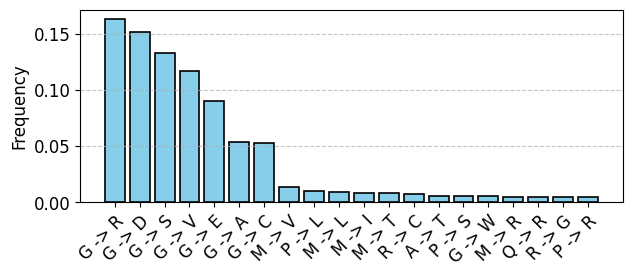

In [3]:

mutations = muttype_sorted
frequencies = mutfreq_sorted
plt.figure(figsize=(7,2.5))
bars = plt.bar(mutations, frequencies, color='skyblue', edgecolor='black', linewidth=1.2)

# plt.title('Frequencies of Different Mutation Types', fontsize=16)
# plt.xlabel('Mutation Types', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.xticks(rotation=45, fontsize=12,ha='right',rotation_mode='anchor')
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

(4756, 16) (46646, 16) (39211, 16)
clin_a_pP_lowpLDDT Counter({'Likely benign': 25669, 'Benign': 11622, 'Likely pathogenic': 2522, 'Pathogenic': 2234})
clin_a_pP_iuidr Counter({'Likely benign': 32230, 'Benign': 14506, 'Likely pathogenic': 5801, 'Pathogenic': 4834})


/tmp/ipykernel_3962/2628754855.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=data,width=0.5,linewidth=1.5,
/tmp/ipykernel_3962/2628754855.py:51: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  vio = sns.violinplot(x='Group', y='Value', data=data,
/tmp/ipykernel_3962/2628754855.py:51: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  vio = sns.violinplot(x='Group', y='Value', data=data,
/tmp/ipykernel_3962/2628754855.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names,fontsize=13)


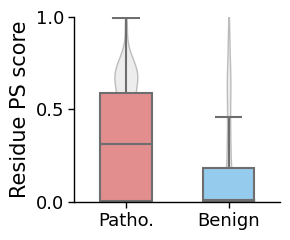

/tmp/ipykernel_3962/2628754855.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=data,width=0.5,linewidth=1.5,
/tmp/ipykernel_3962/2628754855.py:51: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  vio = sns.violinplot(x='Group', y='Value', data=data,
/tmp/ipykernel_3962/2628754855.py:51: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  vio = sns.violinplot(x='Group', y='Value', data=data,
/tmp/ipykernel_3962/2628754855.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names,fontsize=13)


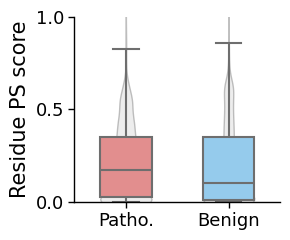

/tmp/ipykernel_3962/2628754855.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=data,width=0.5,linewidth=1.5,
/tmp/ipykernel_3962/2628754855.py:51: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  vio = sns.violinplot(x='Group', y='Value', data=data,
/tmp/ipykernel_3962/2628754855.py:51: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  vio = sns.violinplot(x='Group', y='Value', data=data,
/tmp/ipykernel_3962/2628754855.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names,fontsize=13)


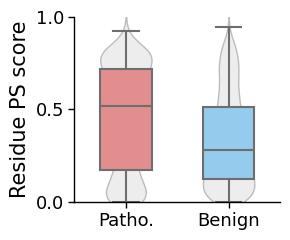

/tmp/ipykernel_3962/2628754855.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=data,width=0.5,linewidth=1.5,
/tmp/ipykernel_3962/2628754855.py:51: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  vio = sns.violinplot(x='Group', y='Value', data=data,
/tmp/ipykernel_3962/2628754855.py:51: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  vio = sns.violinplot(x='Group', y='Value', data=data,
/tmp/ipykernel_3962/2628754855.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names,fontsize=13)


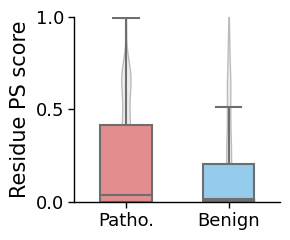

/tmp/ipykernel_3962/2628754855.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=data,width=0.5,linewidth=1.5,
/tmp/ipykernel_3962/2628754855.py:51: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  vio = sns.violinplot(x='Group', y='Value', data=data,
/tmp/ipykernel_3962/2628754855.py:51: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  vio = sns.violinplot(x='Group', y='Value', data=data,
/tmp/ipykernel_3962/2628754855.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names,fontsize=13)


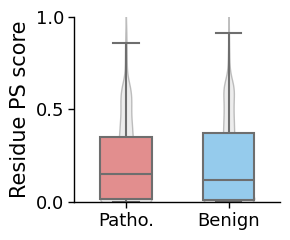

/tmp/ipykernel_3962/2628754855.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=data,width=0.5,linewidth=1.5,
/tmp/ipykernel_3962/2628754855.py:51: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  vio = sns.violinplot(x='Group', y='Value', data=data,
/tmp/ipykernel_3962/2628754855.py:51: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  vio = sns.violinplot(x='Group', y='Value', data=data,
/tmp/ipykernel_3962/2628754855.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names,fontsize=13)


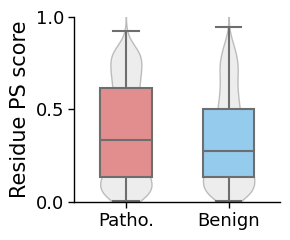

In [4]:
''' 
analyze PSTP score distribution for low-pLDDT variants
'''
import matplotlib.pyplot as plt
import seaborn as sns 
from statannotations.Annotator import Annotator
clinvar_add_pstp = pd.read_csv(
    'data_source/patho_analysis/clinvar_add_plddt_iupred_pstpscores.csv',sep=',',)
cap = clinvar_add_pstp.copy()
patho_label,benign_label = ['Likely pathogenic','Pathogenic'],['Likely benign','Benign']
cap_patho = cap[cap['clinvar_significance'].isin(patho_label)]
cap_patho.reset_index(inplace=True,drop=True)
cap_patho_lowplddt = cap_patho[cap_patho['pLDDT']<50]
cap_patho_mediumplddt = cap_patho[(cap_patho['pLDDT']<70)|(cap_patho['pLDDT']>=50)]
cap_patho_highplddt = cap_patho[cap_patho['pLDDT']>=70]
print(cap_patho_lowplddt.shape,cap_patho_mediumplddt.shape,
      cap_patho_highplddt.shape)

clin_a_pP_lowpLDDT = cap[cap['pLDDT']<50]
clin_a_pP_lowpLDDT.reset_index(inplace=True,drop=True)
print('clin_a_pP_lowpLDDT',Counter(clin_a_pP_lowpLDDT['clinvar_significance'].values))
print('clin_a_pP_iuidr',Counter(clin_a_pP_iuidr['clinvar_significance'].values,))


# # (4756, 16) (46646, 16) (39211, 16)
# # Counter({'Likely benign': 25669, 'Benign': 11622, 'Likely pathogenic': 2522, 'Pathogenic': 2234})



def graph_box(dat_lst_lst,names,pairs=None,
                               ylabel='Residue PS score',
                               savepth=None,palette = ['lightcoral','lightskyblue'],
                               title='',ylim=None,):
    '''  
    dat_lst_lst contains list of score list
    '''
    groups,values = [],[]
    for lst,name in zip(dat_lst_lst,names):
        groups += [name]*len(lst)
        values += list(lst)
    
    data = pd.DataFrame({
        'Group': groups,
        'Value': values,
        
    })
    fig, ax = plt.subplots(figsize=(3,2.5))
    sns.boxplot(x='Group', y='Value', data=data,width=0.5,linewidth=1.5,
                showfliers=False,
                palette=palette,)    
    vio = sns.violinplot(x='Group', y='Value', data=data,
                         color='gainsboro',scale='width',
                   bw=0.2,inner=None,width=0.5,linewidth=1,
                   zorder=0)    
    for violin in vio.collections:
        violin.set_alpha(0.5)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)
    ax.tick_params(axis='both', which='major', width=1,length=4,labelsize=13)
    ax.set_ylabel(ylabel,fontsize=15)
    ax.set_ylim(0,1)
    ax.set_xticklabels(names,fontsize=13)
    ax.set_xlabel('')
    ax.set_title(title)
    ax.set_yticks([0,0.5,1])
    if pairs:
        pass
        # anno = Annotator(ax,pairs,x='Group', y='Value', data=data,
        #                  )
        # anno.configure(test='Mann-Whitney',fontsize=13,line_height=0,text_format='simple',
        #                ) 
        # anno.apply_and_annotate()
    
    if ylim:
        ax.set_ylim(ylim)
    
    if savepth:
        plt.savefig(savepth)
    plt.tight_layout()
    plt.show()
''' 
idr defined by pLDDT scores
'''
graph_box(
    [clin_a_pP_lowpLDDT_patho['saps_residue_score'].values,
     clin_a_pP_lowpLDDT_benign['saps_residue_score'].values],['Patho.','Benign'],
     pairs=[('Patho.','Benign')],
)


graph_box(
    [clin_a_pP_lowpLDDT_patho['pdps_residue_score'].values,
     clin_a_pP_lowpLDDT_benign['pdps_residue_score'].values],['Patho.','Benign'],
     pairs=[('Patho.','Benign')],
)


graph_box(
    [clin_a_pP_lowpLDDT_patho['mix_residue_score'].values,
     clin_a_pP_lowpLDDT_benign['mix_residue_score'].values],['Patho.','Benign'],
     pairs=[('Patho.','Benign')],
)

''' 
idr defined by IUPred scores
'''

graph_box(
    [clin_a_pP_iuidr_patho['saps_residue_score'].values,
     clin_a_pP_iuidr_benign['saps_residue_score'].values],['Patho.','Benign'],
     pairs=[('Patho.','Benign')],
)


graph_box(
    [clin_a_pP_iuidr_patho['pdps_residue_score'].values,
     clin_a_pP_iuidr_benign['pdps_residue_score'].values],['Patho.','Benign'],
     pairs=[('Patho.','Benign')],
)


graph_box(
    [clin_a_pP_iuidr_patho['mix_residue_score'].values,
     clin_a_pP_iuidr_benign['mix_residue_score'].values],['Patho.','Benign'],
)




/tmp/ipykernel_3962/2628754855.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=data,width=0.5,linewidth=1.5,
/tmp/ipykernel_3962/2628754855.py:51: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  vio = sns.violinplot(x='Group', y='Value', data=data,
/tmp/ipykernel_3962/2628754855.py:51: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  vio = sns.violinplot(x='Group', y='Value', data=data,
/tmp/ipykernel_3962/2628754855.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names,fontsize=13)


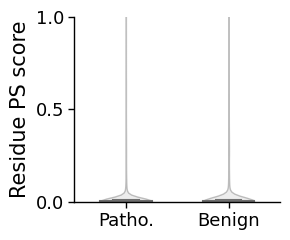

/tmp/ipykernel_3962/2628754855.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=data,width=0.5,linewidth=1.5,
/tmp/ipykernel_3962/2628754855.py:51: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  vio = sns.violinplot(x='Group', y='Value', data=data,
/tmp/ipykernel_3962/2628754855.py:51: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  vio = sns.violinplot(x='Group', y='Value', data=data,
/tmp/ipykernel_3962/2628754855.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names,fontsize=13)


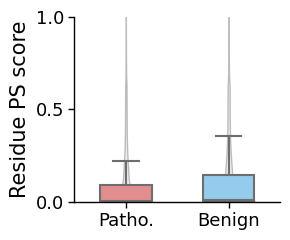

/tmp/ipykernel_3962/2628754855.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=data,width=0.5,linewidth=1.5,
/tmp/ipykernel_3962/2628754855.py:51: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  vio = sns.violinplot(x='Group', y='Value', data=data,
/tmp/ipykernel_3962/2628754855.py:51: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  vio = sns.violinplot(x='Group', y='Value', data=data,
/tmp/ipykernel_3962/2628754855.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names,fontsize=13)


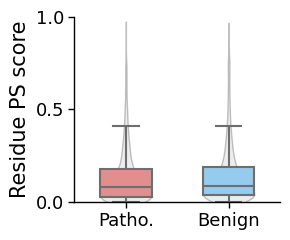

In [5]:
''' 
high pLDDT variants
'''
graph_box(
    [clin_a_pP_highpLDDT_patho['saps_residue_score'].values,
     clin_a_pP_highpLDDT_benign['saps_residue_score'].values],['Patho.','Benign'],
     pairs=[('Patho.','Benign')],
)


graph_box(
    [clin_a_pP_highpLDDT_patho['pdps_residue_score'].values,
     clin_a_pP_highpLDDT_benign['pdps_residue_score'].values],['Patho.','Benign'],
     pairs=[('Patho.','Benign')],
)


graph_box(
    [clin_a_pP_highpLDDT_patho['mix_residue_score'].values,
     clin_a_pP_highpLDDT_benign['mix_residue_score'].values],['Patho.','Benign'],
     pairs=[('Patho.','Benign')],
)


In [6]:
''' 
analyze non-missense mutations 
'''
from scipy.stats import ks_2samp

clinvar_non_missense_data = pd.read_csv(
    'data_source/patho_analysis/non_missense_mutations_pandb_addinfo.csv',
    sep=',')

print(list(Counter(clinvar_non_missense_data['consequence'].values).keys()))
nonsense,frameshift,deletion,insertion,splice,others = 0,0,0,0,0,0
other_var_types = []
type_lst = []
for conse in clinvar_non_missense_data['consequence'].values:
    if 'stop_gained' in conse and 'deletion' not in conse \
        and 'shift' not in conse and 'insert' not in conse:
        nonsense += 1
        type_lst.append('nonsense')
    elif 'shift' in conse and 'inframe' not in conse:
        frameshift += 1
        type_lst.append('frameshift')
    elif 'delet' in conse:
        deletion += 1
        type_lst.append('inframe_deletion')
    elif 'insert' in conse:
        insertion += 1
        type_lst.append('insertion')
    elif 'spli' in conse:
        splice += 1
        type_lst.append('splice_altering')
    else:
        others += 1
        other_var_types.append(conse)
        type_lst.append('others')
        
print(set(other_var_types))
print(nonsense,frameshift,deletion,insertion,splice,others)
print(clinvar_non_missense_data.shape)
clinvar_non_missense_data['mutation_type'] = type_lst
clinvar_non_missense_data['delta_saps'] = clinvar_non_missense_data['mt_saps'] - clinvar_non_missense_data['wt_saps']
clinvar_non_missense_data['delta_pdps'] = clinvar_non_missense_data['mt_pdps'] - clinvar_non_missense_data['wt_pdps']
clinvar_non_missense_data['delta_mix'] = clinvar_non_missense_data['mt_mix'] - clinvar_non_missense_data['wt_mix']


print(clinvar_non_missense_data.columns)
print(Counter(clinvar_non_missense_data['consequence'].values))
cnmd = clinvar_non_missense_data.copy()
cnmd_patho = cnmd[cnmd['clinvar_significance']=='Pathogenic']
cnmd_del_patho = cnmd_patho[cnmd_patho['mutation_type']=='inframe_deletion']
print(cnmd_del_patho)
cnmd_benign = cnmd[(cnmd['clinvar_significance']=='Likely benign')|
                   (cnmd['clinvar_significance']=='Benign')]
cnmd_del_benign = cnmd_benign[cnmd_benign['mutation_type']=='inframe_deletion']

print('number of cnmd patho:',cnmd_patho.shape)
print('number of cnmd benign:',cnmd_benign.shape)
cnmd_nonsense_shift = cnmd[cnmd['mutation_type'].isin(['frameshift','nonsense'])]
cnmd_nonsense_shift_patho = cnmd_nonsense_shift[cnmd_nonsense_shift['clinvar_significance']=='Pathogenic']
cnmd_nonsense_shift_benign = cnmd_nonsense_shift[cnmd_nonsense_shift['clinvar_significance'].isin(['Likely benign','Benign'])]


print('SaPS')
cnmd_patho_saps_abs = np.abs(cnmd_patho['delta_mix'].values) 
cnmd_benign_saps_abs = np.abs(cnmd_benign['delta_mix'].values) 
print(np.sum(np.where(cnmd_patho_saps_abs>0.1,1,0))/len(cnmd_patho_saps_abs)) ##0.14
print(np.sum(np.where(cnmd_benign_saps_abs>0.1,1,0))/len(cnmd_benign_saps_abs)) ## 0.005
print(np.average(np.abs(cnmd_patho['delta_saps'].values)))
print(np.average(np.abs(cnmd_benign['delta_saps'].values)))
print(mannwhitneyu(np.abs(cnmd_patho['delta_saps'].values),
                         np.abs(cnmd_benign['delta_saps'].values)))
print(ks_2samp(cnmd_patho['delta_saps'].values,
                         cnmd_benign['delta_saps'].values))
print('PdPS')
print(np.average(np.abs(cnmd_patho['delta_pdps'].values)))
print(np.average(np.abs(cnmd_benign['delta_pdps'].values)))
print(mannwhitneyu(np.abs(cnmd_patho['delta_pdps'].values),
                         np.abs(cnmd_benign['delta_pdps'].values)))
print(ks_2samp(cnmd_patho['delta_pdps'].values,
      cnmd_benign['delta_pdps'].values))
print('Mix')
print(np.average(np.abs(cnmd_patho['delta_mix'].values)))
print(np.average(np.abs(cnmd_benign['delta_mix'].values)))
print(mannwhitneyu(np.abs(cnmd_patho['delta_mix'].values),
                         np.abs(cnmd_benign['delta_mix'].values)))
print(ks_2samp(cnmd_patho['delta_mix'].values,
                         cnmd_benign['delta_mix'].values))

['inframe_deletion', 'inframe_deletion,NMD_transcript_variant', 'protein_altering_variant', 'stop_gained', 'stop_gained,protein_altering_variant', 'stop_gained,protein_altering_variant,NMD_transcript_variant', 'stop_gained,frameshift_variant', 'stop_gained,frameshift_variant,NMD_transcript_variant', 'stop_gained,NMD_transcript_variant', 'protein_altering_variant,NMD_transcript_variant', 'stop_gained,inframe_deletion', 'inframe_deletion,splice_region_variant', 'stop_gained,splice_region_variant', 'start_lost,inframe_deletion', 'inframe_insertion', 'stop_gained,inframe_deletion,NMD_transcript_variant', 'inframe_deletion,splice_region_variant,NMD_transcript_variant', 'stop_gained,splice_region_variant,NMD_transcript_variant', 'stop_gained,frameshift_variant,splice_region_variant', 'stop_gained,frameshift_variant,splice_region_variant,NMD_transcript_variant', 'missense_variant,NMD_transcript_variant', 'stop_gained,inframe_deletion,splice_region_variant', 'stop_gained,inframe_deletion,splic

In [7]:
'''
analyze aa type of del mutations
cnmd_del_patho,cnmd_del_benign

'''
patho_deleted_aa_collections = []
cnmd_del_patho_highpsalter = cnmd_del_patho[
    (cnmd_del_patho['delta_saps']>0.1)|
    (cnmd_del_patho['delta_pdps']>0.1)|
    (cnmd_del_patho['delta_mix']>0.1)|
    (cnmd_del_patho['delta_saps']<-0.1)|
    (cnmd_del_patho['delta_pdps']<-0.1)|
    (cnmd_del_patho['delta_mix']<-0.1)]
for aa_alter in cnmd_del_patho_highpsalter['aa_alter'].values:
    _deleted_aas = aa_alter.split('/')[0]
    patho_deleted_aa_collections += list(_deleted_aas)
print(Counter(patho_deleted_aa_collections))


Counter({'E': 436, 'S': 414, 'L': 364, 'K': 360, 'G': 337, 'Q': 299, 'P': 270, 'A': 238, 'V': 231, 'R': 201, 'Y': 168, 'T': 160, 'D': 136, 'I': 127, 'C': 125, 'H': 104, 'N': 95, 'F': 93, 'M': 28, 'W': 18})


/tmp/ipykernel_3962/3339880587.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cnmd_nonsense_shift_benign['delta_saps'].values, alpha=0.5,linewidth=2,
/tmp/ipykernel_3962/3339880587.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cnmd_nonsense_shift_patho['delta_saps'].values, alpha=0.5,linewidth=2,


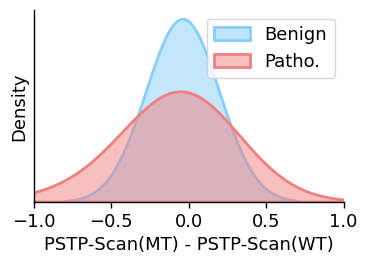

/tmp/ipykernel_3962/3339880587.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cnmd_nonsense_shift_benign['delta_pdps'].values, alpha=0.5,linewidth=2,
/tmp/ipykernel_3962/3339880587.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cnmd_nonsense_shift_patho['delta_pdps'].values, alpha=0.5,linewidth=2,


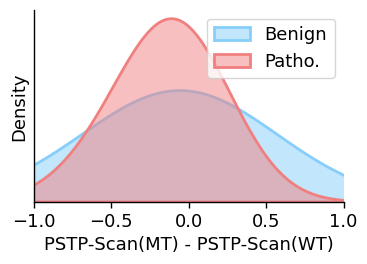

/tmp/ipykernel_3962/3339880587.py:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cnmd_nonsense_shift_benign['delta_mix'].values, alpha=0.5,linewidth=2,
/tmp/ipykernel_3962/3339880587.py:52: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cnmd_nonsense_shift_patho['delta_mix'].values, alpha=0.5,linewidth=2,


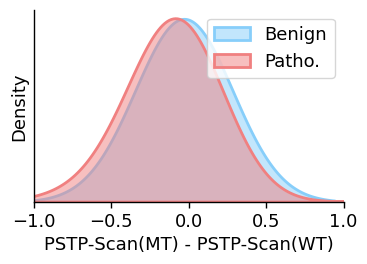

In [8]:

import seaborn as sns 
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator



fig, ax = plt.subplots(figsize=(4,2.5))

sns.kdeplot(cnmd_nonsense_shift_benign['delta_saps'].values, alpha=0.5,linewidth=2,
            shade=True, color='lightskyblue',bw_adjust=10, label='Benign')
sns.kdeplot(cnmd_nonsense_shift_patho['delta_saps'].values, alpha=0.5,linewidth=2,
            shade=True, color='lightcoral',bw_adjust=10,label='Patho.')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.tick_params(axis='both', which='major', width=1,length=4,labelsize=13)
# plt.yscale('log')
ax.legend(fontsize=13)
ax.set_xlim(-1,1)
ax.set_yticklabels('')
ax.set_yticks([])
plt.xlabel('PSTP-Scan(MT) - PSTP-Scan(WT)',fontsize=13)
plt.ylabel('Density',fontsize=13)
plt.show()

fig, ax = plt.subplots(figsize=(4,2.5))

sns.kdeplot(cnmd_nonsense_shift_benign['delta_pdps'].values, alpha=0.5,linewidth=2,
            shade=True, color='lightskyblue',bw_adjust=10, label='Benign')
sns.kdeplot(cnmd_nonsense_shift_patho['delta_pdps'].values, alpha=0.5,linewidth=2,
            shade=True, color='lightcoral',bw_adjust=10,label='Patho.')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.tick_params(axis='both', which='major', width=1,length=4,labelsize=13)
# plt.yscale('log')
ax.legend(fontsize=13)
ax.set_xlim(-1,1)
ax.set_yticklabels('')
ax.set_yticks([])
plt.xlabel('PSTP-Scan(MT) - PSTP-Scan(WT)',fontsize=13)
plt.ylabel('Density',fontsize=13)
plt.show()


fig, ax = plt.subplots(figsize=(4,2.5))

sns.kdeplot(cnmd_nonsense_shift_benign['delta_mix'].values, alpha=0.5,linewidth=2,
            shade=True, color='lightskyblue',bw_adjust=10, label='Benign')
sns.kdeplot(cnmd_nonsense_shift_patho['delta_mix'].values, alpha=0.5,linewidth=2,
            shade=True, color='lightcoral',bw_adjust=10,label='Patho.')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.tick_params(axis='both', which='major', width=1,length=4,labelsize=13)
# plt.yscale('log')
ax.legend(fontsize=13)
ax.set_xlim(-1,1)
ax.set_yticklabels('')
ax.set_yticks([])
plt.xlabel('PSTP-Scan(MT) - PSTP-Scan(WT)',fontsize=13)
plt.ylabel('Density',fontsize=13)
plt.show()

KstestResult(statistic=0.1948868555933628, pvalue=5.683604182391681e-110, statistic_location=-0.0006816354, statistic_sign=1)
6341
6869


/tmp/ipykernel_3962/2969921683.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cnmd_del_benign['delta_saps'].values, alpha=0.5,linewidth=2,
/tmp/ipykernel_3962/2969921683.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cnmd_del_patho['delta_saps'].values, alpha=0.5,linewidth=2,


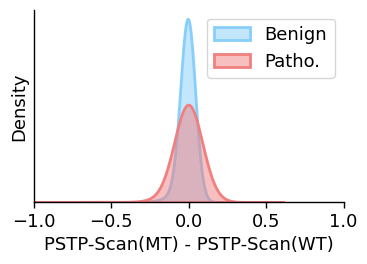

In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
from scipy.stats import ks_2samp


fig, ax = plt.subplots(figsize=(4,2.5))
print(ks_2samp(cnmd_del_benign['delta_saps'].values,cnmd_del_patho['delta_saps'].values))
sns.kdeplot(cnmd_del_benign['delta_saps'].values, alpha=0.5,linewidth=2,
            shade=True, color='lightskyblue',bw_adjust=10, label='Benign')
sns.kdeplot(cnmd_del_patho['delta_saps'].values, alpha=0.5,linewidth=2,
            shade=True, color='lightcoral',bw_adjust=10,label='Patho.')
print(len(cnmd_del_benign['delta_saps'].values))
print(len(cnmd_del_patho['delta_saps'].values))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.tick_params(axis='both', which='major', width=1,length=4,labelsize=13)
# plt.yscale('log')
ax.legend(fontsize=13)
ax.set_xlim(-1,1)
ax.set_yticklabels('')
ax.set_yticks([])
plt.xlabel('PSTP-Scan(MT) - PSTP-Scan(WT)',fontsize=13)
plt.ylabel('Density',fontsize=13)
plt.show()

In [10]:

# import seaborn as sns 
# import matplotlib.pyplot as plt
# from statannotations.Annotator import Annotator



# fig, ax = plt.subplots(figsize=(4,2.5))

# sns.kdeplot(cnmd_nonsense_shift_benign['delta_mix'].values, alpha=0.5,linewidth=2,
#             shade=True, color='lightskyblue',bw_adjust=10, label='Benign')
# sns.kdeplot(cnmd_nonsense_shift_patho['delta_mix'].values, alpha=0.5,linewidth=2,
#             shade=True, color='lightcoral',bw_adjust=10,label='Patho.')
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
# ax.spines['bottom'].set_linewidth(1)
# ax.spines['left'].set_linewidth(1)
# ax.tick_params(axis='both', which='major', width=1,length=4,labelsize=13)
# # plt.yscale('log')
# ax.legend(fontsize=13)
# ax.set_xlim(-1,1)
# ax.set_yticklabels('')
# ax.set_yticks([])
# plt.xlabel('PSTP-Scan(MT) - PSTP-Scan(WT)',fontsize=13)
# plt.ylabel('Density',fontsize=13)
# plt.show()